In [ ]:
#Initial EDA 
#We have parsed out the data from garmin for each athlete, and gathered 1 month prior and 3 months prior data.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
import matplotlib.dates as mdates
import datetime
import json
import os
import glob

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
#Let's read in a sample 1 month file:
sample_1_mo = pd.read_csv('./data/races/athlete_9/athlete_9_race_10_1_mo.csv', index_col='date')

In [5]:
sample_1_mo.head()

,activity_type,favorite,title,distance,calories,time,avg_hr,max_hr,aerobic_te,avg_run_cadence,...,surface_interval,decompression,best_lap_time,number_of_laps,max_temp,athlete_id,filetype,is_race,avg_pace,best_pace
date,,,,,,,,,,,,,,,,,,,,,
2017-03-22,Treadmill Running,False,Treadmill Running,0.02,216,00:19:05,131,154,2.0,5,...,0:00,No,00:00.00,0,0.0,9,garmin,0,00:00:00,00:00:00
2017-03-22,Treadmill Running,False,Treadmill Running,1.04,130,00:08:49.0,155,166,2.1,175,...,0:00,No,00:00.00,0,0.0,9,garmin,0,0 days 00:08:31,0 days 00:08:31
2017-03-23,Treadmill Running,False,Treadmill Running,1.91,247,00:16:34,157,166,2.6,173,...,0:00,No,00:00.00,0,0.0,9,garmin,0,0 days 00:08:40,0 days 00:08:40
2017-03-23,Indoor Cycling,False,Indoor Cycling,0.00,760,01:03:43,138,169,3.0,0,...,0:00,No,00:00.00,0,0.0,9,garmin,0,00:00:00,00:00:00
2017-03-24,Treadmill Running,False,Treadmill Running,3.44,414,00:30:05,143,157,2.9,172,...,0:00,No,00:00.00,0,0.0,9,garmin,0,0 days 00:08:44,0 days 00:08:44


In [6]:
#Find out what the race is:
sample_1_mo[sample_1_mo['is_race'] == 1]

,activity_type,favorite,title,distance,calories,time,avg_hr,max_hr,aerobic_te,avg_run_cadence,...,surface_interval,decompression,best_lap_time,number_of_laps,max_temp,athlete_id,filetype,is_race,avg_pace,best_pace
date,,,,,,,,,,,,,,,,,,,,,
2017-04-09,Cycling,False,Spicewood Cycling,3.46,157,00:21:55,113,151,1.5,0,...,0:00,No,00:00.00,0,0.0,9,garmin,1,00:00:00,00:00:00
2017-04-09,Cycling,True,Spicewood Cycling,24.91,"1,737",02:07:12,164,182,4.2,0,...,0:00,No,00:00.00,0,0.0,9,garmin,1,00:00:00,00:00:00
2017-04-09,Running,True,Spicewood Running,2.64,316,00:21:57,157,174,2.9,159,...,0:00,No,00:00.00,0,0.0,9,garmin,1,0 days 00:08:19,0 days 00:08:19
2017-04-22,Cycling,False,Spicewood Cycling,1.45,139,00:10:21,145,167,2.0,0,...,0:00,No,00:00.00,0,0.0,9,garmin,1,00:00:00,00:00:00
2017-04-22,Running,False,Spicewood Running,0.67,80,00:05:29.5,150,162,1.8,173,...,0:00,No,00:00.00,0,0.0,9,garmin,1,0 days 00:08:08,0 days 00:08:08
2017-04-22,Multisport,True,Spicewood Multi-Sport,12.84,"1,246",01:40:42,0,188,0.0,0,...,0:00,No,00:00.00,0,0.0,9,garmin,1,00:00:00,00:00:00
2017-04-22,Cycling,True,Spicewood Cycling,1.87,136,00:08:51.8,153,166,2.0,0,...,0:00,No,00:00.00,0,0.0,9,garmin,1,00:00:00,00:00:00
2017-04-22,Running,True,Spicewood Running,3.26,371,00:23:59,163,173,3.0,170,...,0:00,No,00:00.00,0,0.0,9,garmin,1,0 days 00:07:22,0 days 00:07:22


In [7]:
#Looks like it was a triathlon. (activity_type = Multi-Sport)

Let's look at just the running portion:

In [8]:
s_1_1_run = sample_1_mo[sample_1_mo['activity_type'] == 'Running']
s_1_1_run.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, 2017-03-25 to 2017-04-22
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   activity_type             16 non-null     object 
 1   favorite                  16 non-null     bool   
 2   title                     16 non-null     object 
 3   distance                  16 non-null     object 
 4   calories                  16 non-null     object 
 5   time                      16 non-null     object 
 6   avg_hr                    16 non-null     int64  
 7   max_hr                    16 non-null     int64  
 8   aerobic_te                16 non-null     float64
 9   avg_run_cadence           16 non-null     int64  
 10  max_run_cadence           16 non-null     int64  
 11  avg_speed                 16 non-null     object 
 12  max_speed                 16 non-null     object 
 13  elev_gain                 16 non-null     object 
 14  

In [9]:
s_1_1_run['avg_pace'] = pd.to_timedelta(s_1_1_run['avg_pace'])

In [10]:
s_1_1_run['distance'] = pd.to_numeric(s_1_1_run['distance'])
type(s_1_1_run['distance'][0])

numpy.float64

In [11]:
type(s_1_1_run['avg_pace'][0])

pandas._libs.tslibs.timedeltas.Timedelta

In [12]:
s_1_1_run['avg_pace'][0]

Timedelta('0 days 00:08:54')

In [13]:
#Let's process some timedeltas so we can actually graph them:
#Arbitrary zero time/date:
zero = datetime.datetime(2017,1,1)
avg_pace = [zero + t for t in s_1_1_run['avg_pace']]

In [14]:
#check out what we made:
avg_pace[:3]

[datetime.datetime(2017, 1, 1, 0, 8, 54),
 datetime.datetime(2017, 1, 1, 0, 8, 12),
 datetime.datetime(2017, 1, 1, 0, 14, 33)]

In [15]:
zero = mdates.date2num(zero)
avg_pace = [t-zero for t in mdates.date2num(avg_pace)]
avg_pace[:3]

[0.006180555556056788, 0.005694444444088731, 0.010104166667588288]

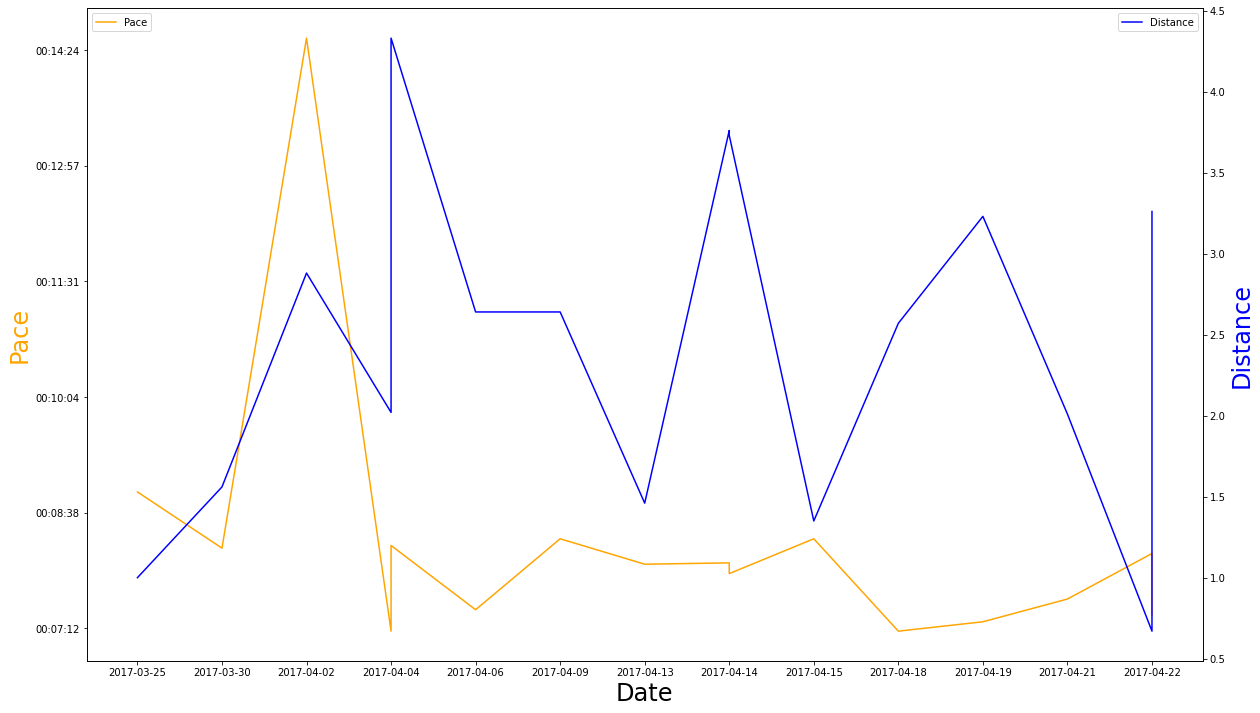

In [16]:
fig, ax = plt.subplots(figsize = (20, 12))
ax.plot(s_1_1_run.index, avg_pace, label='Pace', color='orange')
ax.set_xlabel("Date",fontsize=24)
ax.set_ylabel("Pace", fontsize=24, color='orange')
ax.yaxis.set_major_formatter(mdates.DateFormatter("%H:%M:%S"))
plt.legend(loc='upper left')
ax2 = ax.twinx()
ax2.plot(s_1_1_run.index, s_1_1_run['distance'], label = 'Distance', color='blue')
ax2.set_ylabel("Distance", fontsize=24, color = 'blue')
plt.legend()

In [17]:
#Let's read in the 3 month file:
sample_3_mo = pd.read_csv('./data/races/athlete_9/athlete_9_race_10_3_mo.csv', index_col='date')

In [18]:
s_1_3_run = sample_3_mo[sample_3_mo['activity_type'] == 'Running']
s_1_3_run.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, 2017-01-19 to 2017-04-22
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   activity_type             29 non-null     object 
 1   favorite                  29 non-null     bool   
 2   title                     29 non-null     object 
 3   distance                  29 non-null     object 
 4   calories                  29 non-null     object 
 5   time                      29 non-null     object 
 6   avg_hr                    29 non-null     int64  
 7   max_hr                    29 non-null     int64  
 8   aerobic_te                29 non-null     float64
 9   avg_run_cadence           29 non-null     int64  
 10  max_run_cadence           29 non-null     int64  
 11  avg_speed                 29 non-null     object 
 12  max_speed                 29 non-null     object 
 13  elev_gain                 29 non-null     object 
 14  

In [19]:
s_1_3_run['avg_pace'] = pd.to_timedelta(s_1_3_run['avg_pace'])
s_1_3_run['distance'] = pd.to_numeric(s_1_3_run['distance'])

In [20]:
#Let's process some timedeltas so we can actually graph them:
#Arbitrary zero time/date:
zero = datetime.datetime(2017,1,1)
avg_pace = [zero + t for t in s_1_3_run['avg_pace']]
zero = mdates.date2num(zero)
avg_pace = [t-zero for t in mdates.date2num(avg_pace)]
#Output is in fractions of a day:
avg_pace[:3]

[0.00640046296393848, 0.0060995370367891155, 0.005798611109639751]

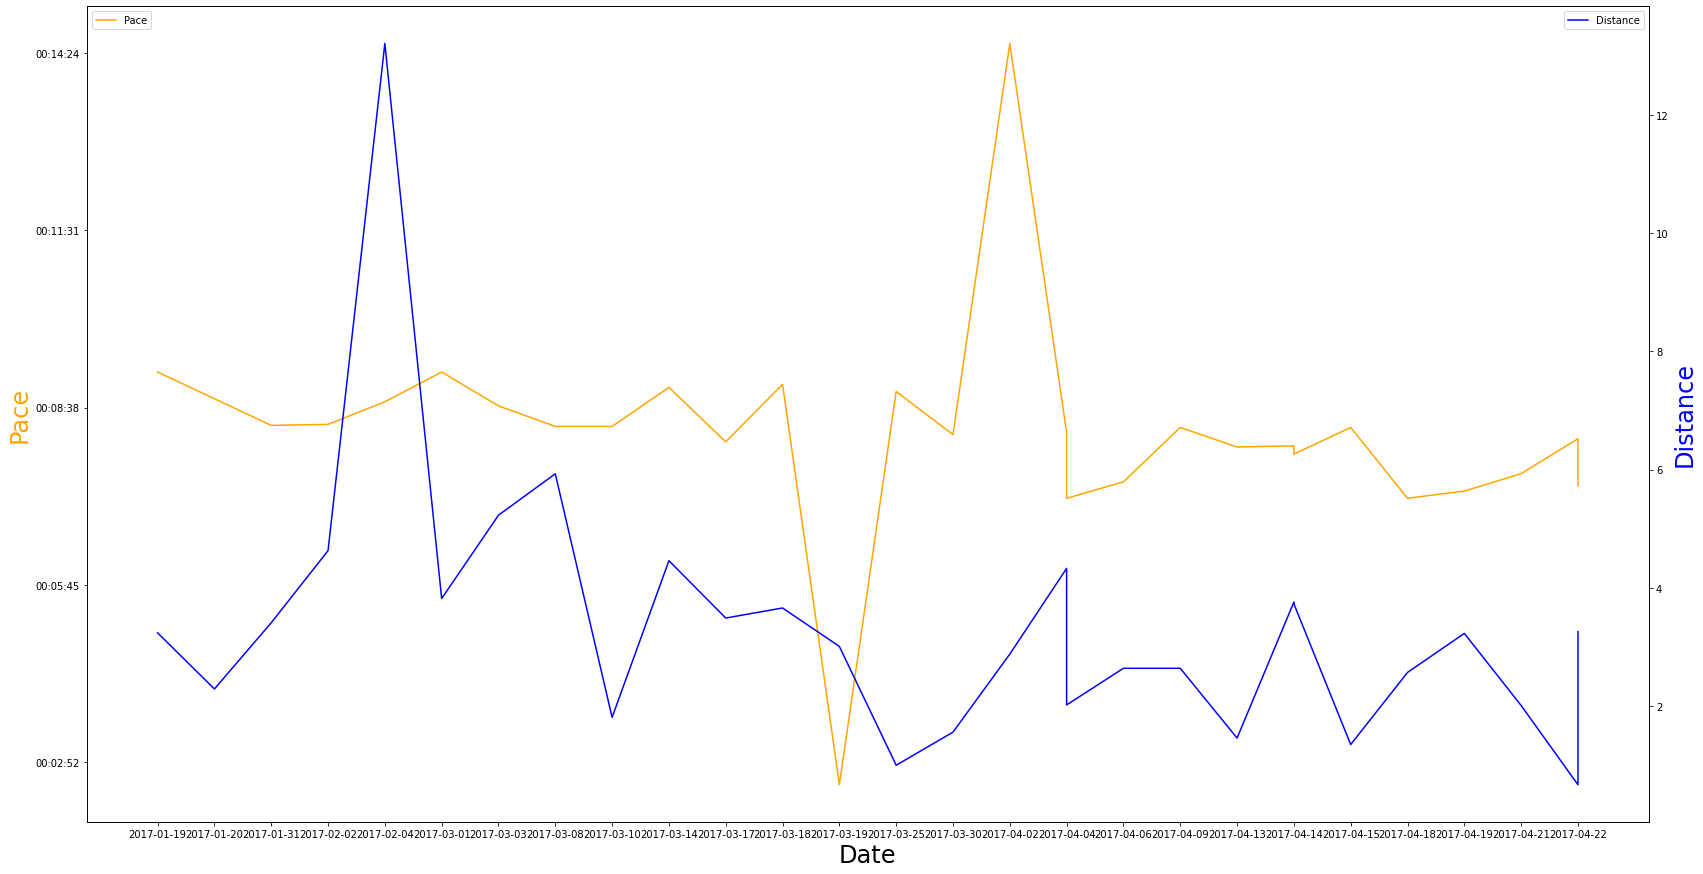

In [21]:
fig, ax = plt.subplots(figsize = (28, 15))
ax.plot(s_1_3_run.index, avg_pace, label='Pace', color='orange')
ax.set_xlabel("Date",fontsize=24)
ax.set_ylabel("Pace", fontsize=24, color='orange')
ax.yaxis.set_major_formatter(mdates.DateFormatter("%H:%M:%S"))
plt.legend(loc='upper left')
ax2 = ax.twinx()
ax2.plot(s_1_3_run.index, s_1_3_run['distance'], label = 'Distance', color='blue')
ax2.set_ylabel("Distance", fontsize=24, color = 'blue')
plt.legend()

In [22]:
#Let's process some timedeltas so we can actually graph them:
#Arbitrary zero time/date:
zero = datetime.datetime(2017,1,1)
train_pace_1 = [zero + t for t in s_1_3_run[s_1_3_run['is_race']==0]['avg_pace']]
zero = mdates.date2num(zero)
train_pace_1 = [t-zero for t in mdates.date2num(train_pace_1)]

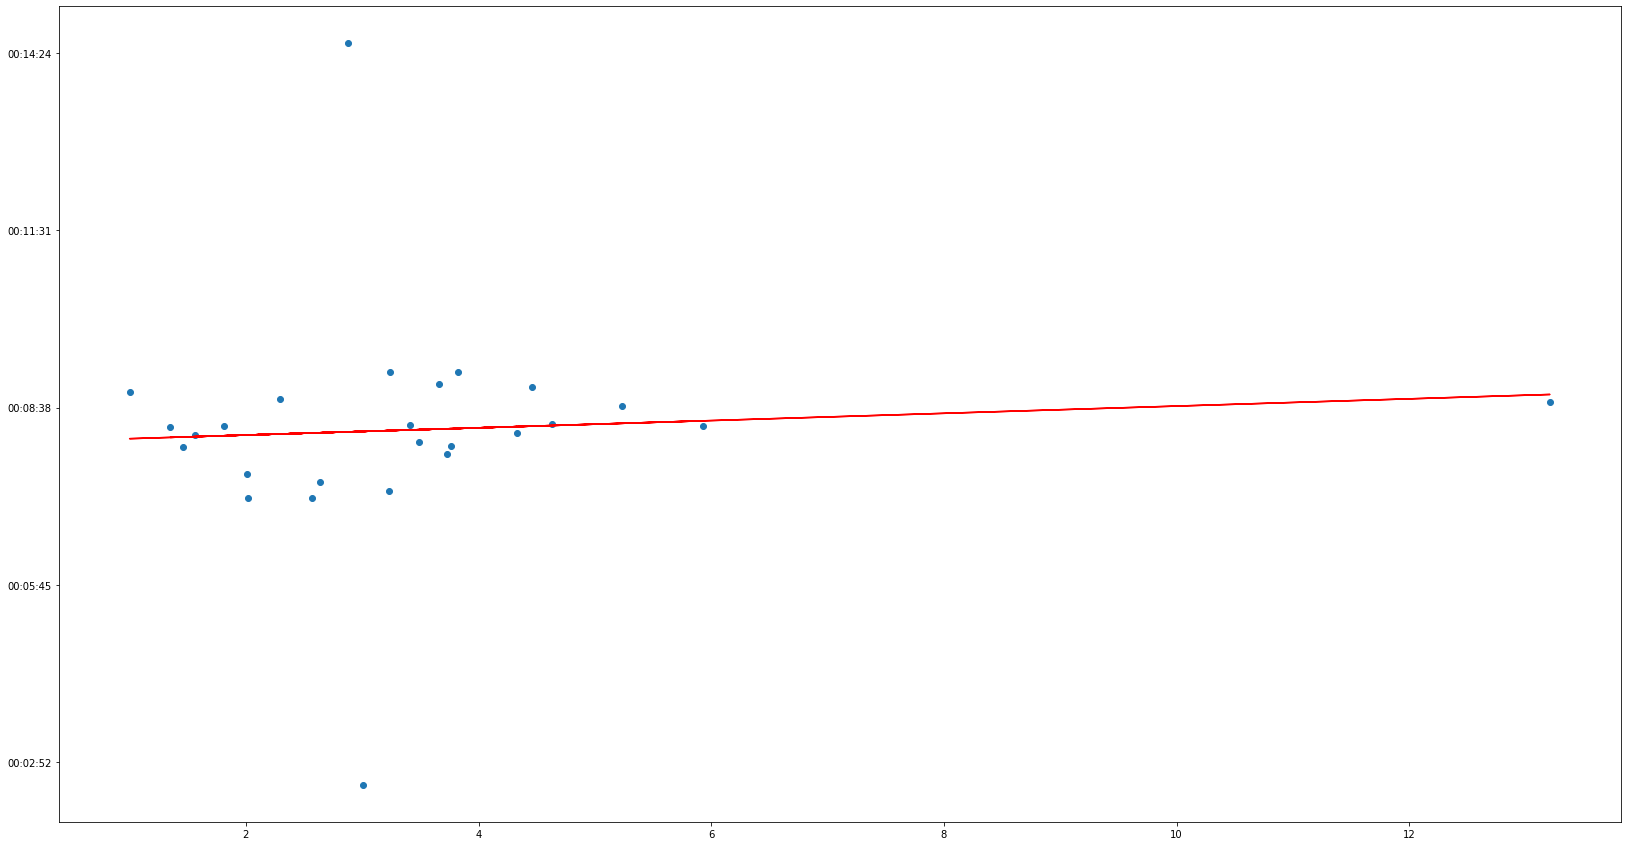

In [23]:
#Lets plot a curve of the distances vs. paces, where the data is not a race:
fig, ax = plt.subplots(figsize=(28,15))
ax.scatter(s_1_3_run[s_1_3_run['is_race'] == 0]['distance'], train_pace_1)
ax.yaxis.set_major_formatter(mdates.DateFormatter("%H:%M:%S"))
m_1, b_1 = np.polyfit(s_1_3_run[s_1_3_run['is_race'] == 0]['distance'], train_pace_1, 1)
plt.plot((s_1_3_run[s_1_3_run['is_race'] == 0]['distance']), (s_1_3_run[s_1_3_run['is_race'] == 0]['distance'])*m_1+b_1, color='red')


In [24]:
#Looks like this athlete is pretty consistent.

Let's predict based on this fit:

In [25]:
s_1_3_run[s_1_3_run['is_race'] == 1]['distance']

date
2017-04-09    2.64
2017-04-22    0.67
2017-04-22    3.26
Name: distance, dtype: float64

In [26]:
race1 = m_1*2.64+b_1
race1_s = race1 * 24 * 60 * 60
race1_s

493.8496436090373

In [27]:
race1_s // 60

8.0

In [28]:
race1_s % 60

13.849643609037287

8:13 predicted.

In [29]:
s_1_3_run[s_1_3_run['is_race'] == 1]['avg_pace']

date
2017-04-09   0 days 00:08:19
2017-04-22   0 days 00:08:08
2017-04-22   0 days 00:07:22
Name: avg_pace, dtype: timedelta64[ns]

8:19 actual!!!

In [30]:
race2 = m_1*3.26+b_1
race2_s = race2 * 24 * 60 * 60
race2_s

496.0363228693126

In [31]:
race2_s // 60

8.0

In [32]:
race2_s % 60

16.036322869312585

Race 2 prediction: 8:16. Actual: 7:22. 

In [33]:
s_1_3_run[s_1_3_run['is_race'] == 1][['avg_hr', 'elev_gain']]

,avg_hr,elev_gain
date,,
2017-04-09,157,89
2017-04-22,150,16
2017-04-22,163,128


In [34]:
#Initial EDA 
#We have parsed out the data from garmin for each athlete, and gathered 1 month prior and 3 months prior data.

In [35]:
#Let's read in a sample 1 month file:
sample_3_mo = pd.read_csv('./data/races/athlete_3/athlete_3_race_1_3_mo.csv', index_col='date')

In [36]:
sample_3_mo.head()

,activity_type,favorite,title,distance,calories,time,avg_hr,max_hr,aerobic_te,avg_run_cadence,...,decompression,best_lap_time,number_of_laps,max_temp,avg_resp,min_resp,max_resp,athlete_id,filetype,is_race
date,,,,,,,,,,,,,,,,,,,,,
2018-03-09,Pool Swimming,False,Lap Swimming,"2,300",416,00:57:22,0,0,0.0,0,...,No,00:00.00,72,0.0,0,0,0,3,garmin,0
2018-03-10,Running,False,Lafayette Running,3.30,409,00:25:02,153,164,2.7,173,...,No,00:00.00,2,0.0,0,0,0,3,garmin,0
2018-03-10,Pool Swimming,False,Lap Swimming,"2,000",390,00:36:47,0,0,0.0,0,...,No,00:00.00,38,0.0,0,0,0,3,garmin,0
2018-03-10,Indoor Cycling,False,Indoor Cycling,0.00,"2,006",02:40:03,137,168,3.4,0,...,No,00:00.00,16,0.0,0,0,0,3,garmin,0
2018-03-11,Running,False,Denver Running,12.01,"1,220",01:31:38,146,163,2.6,175,...,No,00:00.00,2,0.0,0,0,0,3,garmin,0


In [37]:
#Find out what the race is:
sample_3_mo[sample_3_mo['is_race'] == 1]

,activity_type,favorite,title,distance,calories,time,avg_hr,max_hr,aerobic_te,avg_run_cadence,...,decompression,best_lap_time,number_of_laps,max_temp,avg_resp,min_resp,max_resp,athlete_id,filetype,is_race
date,,,,,,,,,,,,,,,,,,,,,
2018-05-05,Multisport,True,Hurricane Multi-Sport,70.12,"3,699",04:35:41,0,172,0.0,0,...,No,00:00.00,5,0.0,0,0,0,3,garmin,1
2018-05-05,Cycling,False,Hurricane Cycling,55.55,"2,378",02:28:57,150,159,0.0,0,...,No,00:00.00,1,0.0,0,0,0,3,garmin,1
2018-06-10,Multisport,True,Boulder Multi-Sport,139.75,"6,936",11:00:17,0,162,0.0,0,...,No,00:00.00,5,0.0,0,0,0,3,garmin,1
2018-06-10,Cycling,False,Boulder Cycling,117.35,"4,019",10:25:46,144,160,0.0,0,...,No,00:00.00,2,0.0,0,0,0,3,garmin,1


In [38]:
#Looks like it was a triathlon. (activity_type = Multi-Sport)

Let's look at just the running portion:

In [39]:
s_3_1_run = sample_3_mo[sample_3_mo['activity_type'] == 'Running']
s_3_1_run.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, 2018-03-10 to 2018-06-07
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   activity_type             52 non-null     object 
 1   favorite                  52 non-null     bool   
 2   title                     52 non-null     object 
 3   distance                  52 non-null     object 
 4   calories                  52 non-null     object 
 5   time                      52 non-null     object 
 6   avg_hr                    52 non-null     int64  
 7   max_hr                    52 non-null     int64  
 8   aerobic_te                52 non-null     float64
 9   avg_run_cadence           52 non-null     int64  
 10  max_run_cadence           52 non-null     int64  
 11  avg_pace                  52 non-null     object 
 12  best_pace                 52 non-null     object 
 13  elev_gain                 52 non-null     object 
 14  

In [40]:
s_3_1_run['avg_pace'] = pd.to_timedelta(s_3_1_run['avg_pace'])

In [41]:
s_3_1_run['distance'] = pd.to_numeric(s_3_1_run['distance'])
type(s_1_1_run['distance'][0])

numpy.float64

In [42]:
type(s_3_1_run['avg_pace'][0])

pandas._libs.tslibs.timedeltas.Timedelta

In [43]:
s_3_1_run['avg_pace'][0]

Timedelta('0 days 00:07:35')

In [44]:
#Let's process some timedeltas so we can actually graph them:
#Arbitrary zero time/date:
zero = datetime.datetime(2017,1,1)
avg_pace = [zero + t for t in s_3_1_run['avg_pace']]

In [45]:
#check out what we made:
avg_pace[:3]

[datetime.datetime(2017, 1, 1, 0, 7, 35),
 datetime.datetime(2017, 1, 1, 0, 7, 38),
 datetime.datetime(2017, 1, 1, 0, 7, 20)]

In [46]:
zero = mdates.date2num(zero)
avg_pace = [t-zero for t in mdates.date2num(avg_pace)]
avg_pace[:3]

[0.005266203705104999, 0.00530092592453002, 0.00509259259342798]

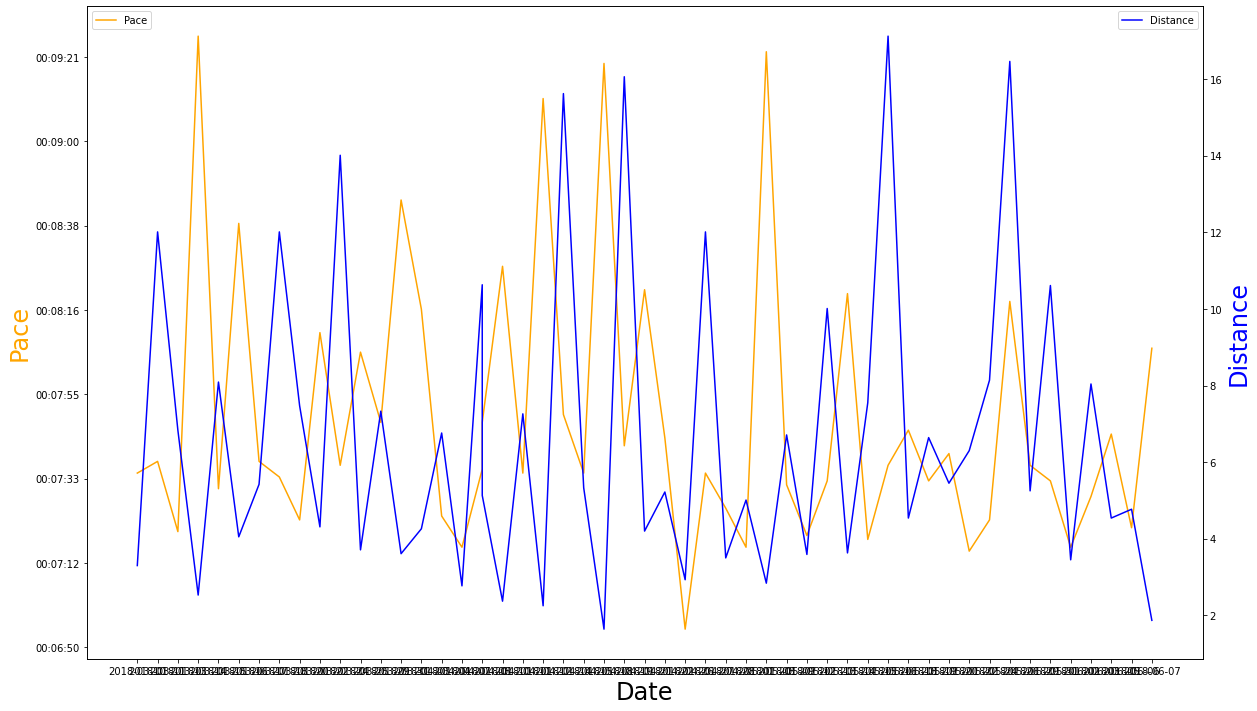

In [47]:
fig, ax = plt.subplots(figsize = (20, 12))
ax.plot(s_3_1_run.index, avg_pace, label='Pace', color='orange')
ax.set_xlabel("Date",fontsize=24)
ax.set_ylabel("Pace", fontsize=24, color='orange')
ax.yaxis.set_major_formatter(mdates.DateFormatter("%H:%M:%S"))
plt.legend(loc='upper left')
ax2 = ax.twinx()
ax2.plot(s_3_1_run.index, s_3_1_run['distance'], label = 'Distance', color='blue')
ax2.set_ylabel("Distance", fontsize=24, color = 'blue')
plt.legend()

In [48]:
#Let's read in the 3 month file:
sample_3_mo = pd.read_csv('./data/races/athlete_3/athlete_3_race_1_3_mo.csv', index_col='date')

In [49]:
s_3_3_run = sample_3_mo[sample_3_mo['activity_type'] == 'Running']
s_3_3_run.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, 2018-03-10 to 2018-06-07
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   activity_type             52 non-null     object 
 1   favorite                  52 non-null     bool   
 2   title                     52 non-null     object 
 3   distance                  52 non-null     object 
 4   calories                  52 non-null     object 
 5   time                      52 non-null     object 
 6   avg_hr                    52 non-null     int64  
 7   max_hr                    52 non-null     int64  
 8   aerobic_te                52 non-null     float64
 9   avg_run_cadence           52 non-null     int64  
 10  max_run_cadence           52 non-null     int64  
 11  avg_pace                  52 non-null     object 
 12  best_pace                 52 non-null     object 
 13  elev_gain                 52 non-null     object 
 14  

In [50]:
s_3_3_run['avg_pace'] = pd.to_timedelta(s_3_3_run['avg_pace'])
s_3_3_run['distance'] = pd.to_numeric(s_3_3_run['distance'])

In [51]:
#Let's process some timedeltas so we can actually graph them:
#Arbitrary zero time/date:
zero = datetime.datetime(2017,1,1)
avg_pace = [zero + t for t in s_3_3_run['avg_pace']]
zero = mdates.date2num(zero)
avg_pace = [t-zero for t in mdates.date2num(avg_pace)]
#Output is in fractions of a day:
avg_pace[:3]

[0.005266203705104999, 0.00530092592453002, 0.00509259259342798]

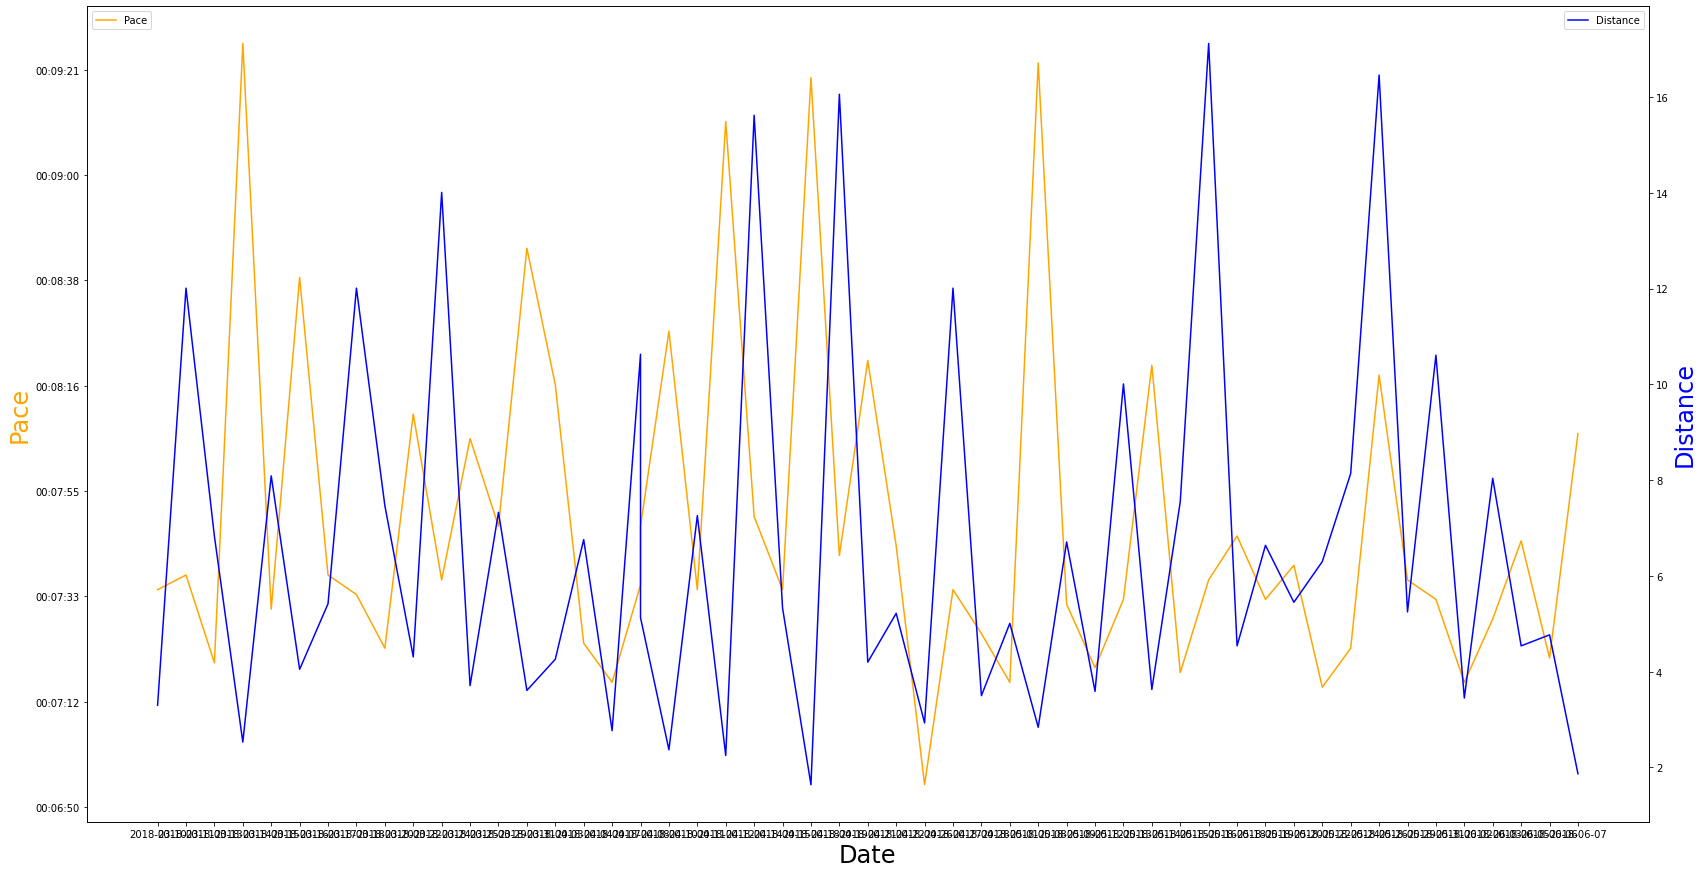

In [52]:
fig, ax = plt.subplots(figsize = (28, 15))
ax.plot(s_3_3_run.index, avg_pace, label='Pace', color='orange')
ax.set_xlabel("Date",fontsize=24)
ax.set_ylabel("Pace", fontsize=24, color='orange')
ax.yaxis.set_major_formatter(mdates.DateFormatter("%H:%M:%S"))
plt.legend(loc='upper left')
ax2 = ax.twinx()
ax2.plot(s_3_3_run.index, s_3_3_run['distance'], label = 'Distance', color='blue')
ax2.set_ylabel("Distance", fontsize=24, color = 'blue')
plt.legend()

In [53]:
#What we can see here is that speed and pace appear to be somewhat inversely proportional, which we would expect. 

In [54]:
#Let's process some timedeltas so we can actually graph them:
#Arbitrary zero time/date:
zero = datetime.datetime(2017,1,1)
train_pace = [zero + t for t in s_3_3_run[s_3_3_run['is_race']==0]['avg_pace']]
zero = mdates.date2num(zero)
train_pace = [t-zero for t in mdates.date2num(train_pace)]

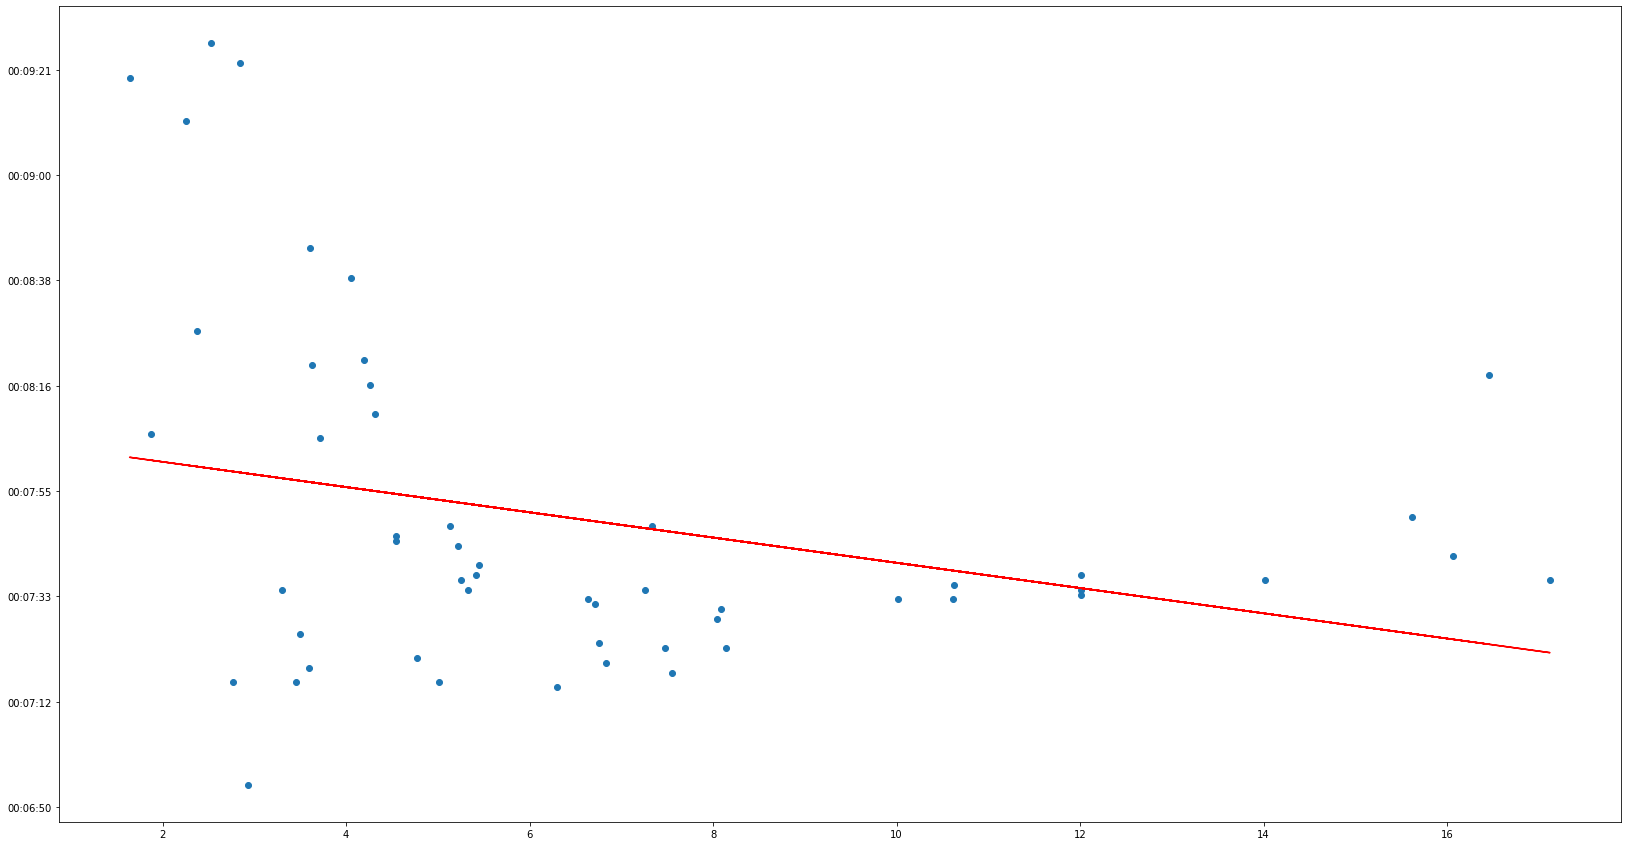

In [55]:
#Lets plot a curve of the distances vs. paces, where the data is not a race:
fig, ax = plt.subplots(figsize=(28,15))
ax.scatter(s_3_3_run[s_3_3_run['is_race'] == 0]['distance'], train_pace)
ax.yaxis.set_major_formatter(mdates.DateFormatter("%H:%M:%S"))
m, b = np.polyfit(s_3_3_run[s_3_3_run['is_race'] == 0]['distance'], train_pace, 1)
plt.plot((s_3_3_run[s_3_3_run['is_race'] == 0]['distance']), (s_3_3_run[s_3_3_run['is_race'] == 0]['distance'])*m+b, color='red')


In [56]:
#Linear Fit. Looks like we might have some different types of runs. Might need to look into 
#weighting the runs based on the intensity, so that slower runs at lower intensity don't skew the data.

In [57]:
s_3_3_run['elev_gain'] = s_3_3_run['elev_gain'].str.replace(',', '').astype(float)
s_3_3_run['elev_gain']

date
2018-03-10      49.0
2018-03-11     410.0
2018-03-13     226.0
2018-03-14      33.0
2018-03-15     253.0
2018-03-16      95.0
2018-03-17     151.0
2018-03-18     384.0
2018-03-20     190.0
2018-03-22     148.0
2018-03-24     377.0
2018-03-25     105.0
2018-03-29     115.0
2018-03-31     115.0
2018-04-03      69.0
2018-04-04     190.0
2018-04-07      66.0
2018-04-08     387.0
2018-04-08     194.0
2018-04-10      56.0
2018-04-11     180.0
2018-04-12      49.0
2018-04-14     597.0
2018-04-15     105.0
2018-04-18      30.0
2018-04-19     620.0
2018-04-21      98.0
2018-04-22     148.0
2018-04-26      59.0
2018-04-27     440.0
2018-04-28      89.0
2018-05-01      79.0
2018-05-08      59.0
2018-05-09     187.0
2018-05-12      62.0
2018-05-13     331.0
2018-05-14      72.0
2018-05-15     266.0
2018-05-16     627.0
2018-05-18     138.0
2018-05-19     194.0
2018-05-20     174.0
2018-05-22     148.0
2018-05-24     315.0
2018-05-26    1020.0
2018-05-29     128.0
2018-05-31      20.0
2018-06-

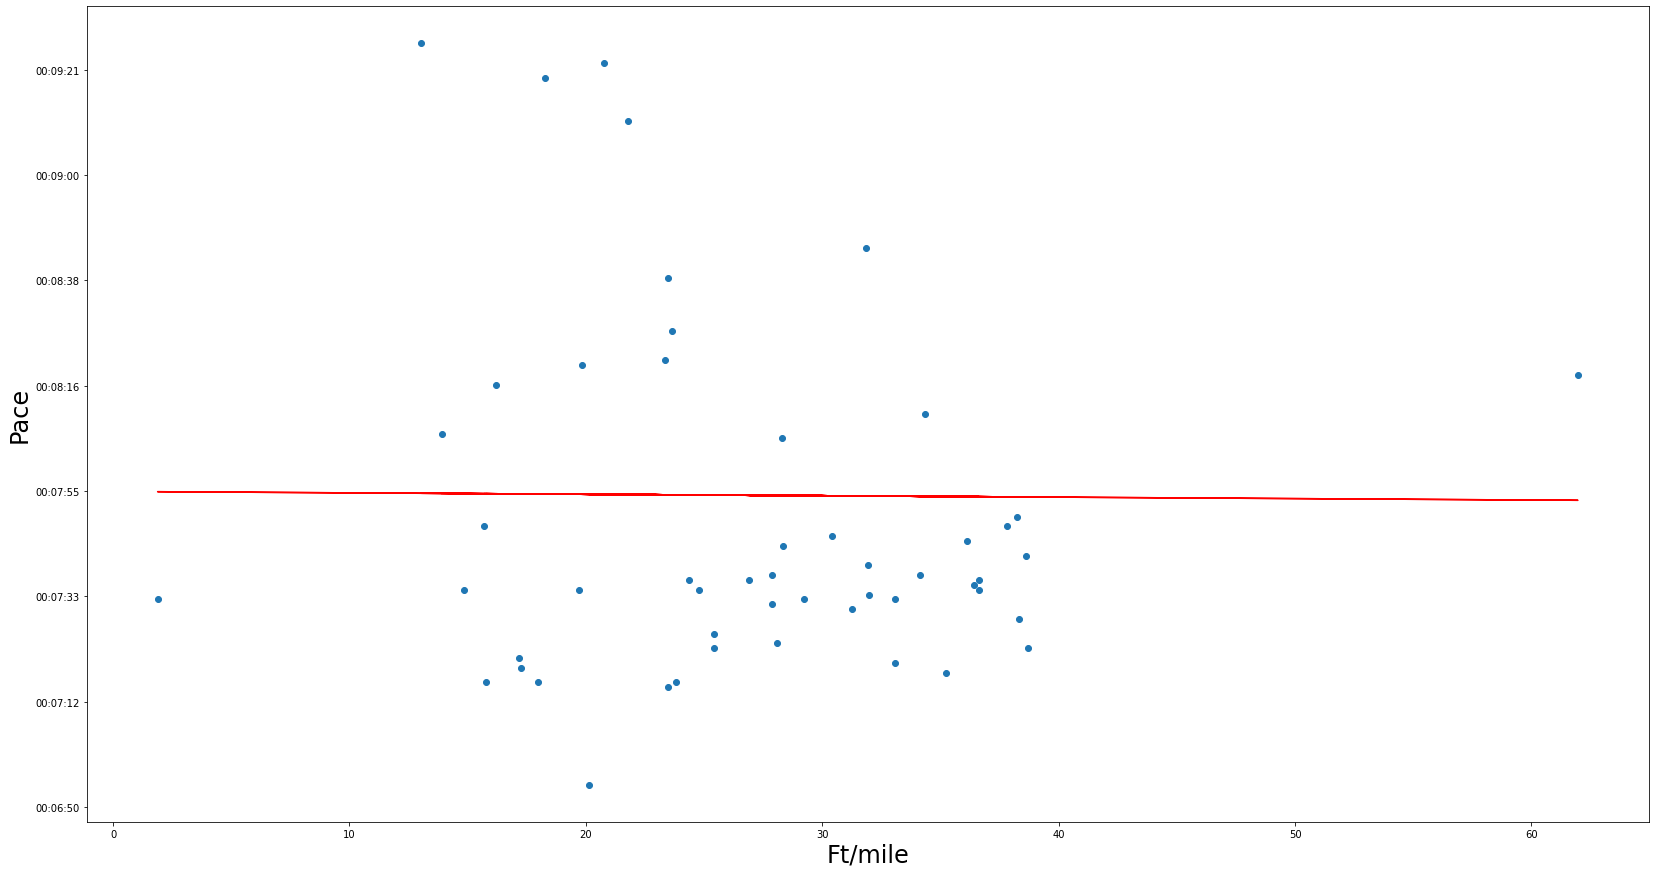

In [58]:
#let's graph elevation gain per mile vs. pace:
fig, ax = plt.subplots(figsize=(28,15))
ax.scatter((s_3_3_run[s_3_3_run['is_race'] == 0]['elev_gain']/s_3_3_run[s_3_3_run['is_race'] == 0]['distance']), train_pace)
ax.yaxis.set_major_formatter(mdates.DateFormatter("%H:%M:%S"))
ax.set_xlabel("Ft/mile",fontsize=24)
ax.set_ylabel("Pace", fontsize=24)
m, b = np.polyfit(s_3_3_run[s_3_3_run['is_race'] == 0]['elev_gain'], train_pace, 1)
plt.plot((s_3_3_run[s_3_3_run['is_race'] == 0]['elev_gain']/s_3_3_run[s_3_3_run['is_race'] == 0]['distance']), (s_3_3_run[s_3_3_run['is_race'] == 0]['elev_gain']/s_3_3_run[s_3_3_run['is_race'] == 0]['distance'])*m+b, color='red')

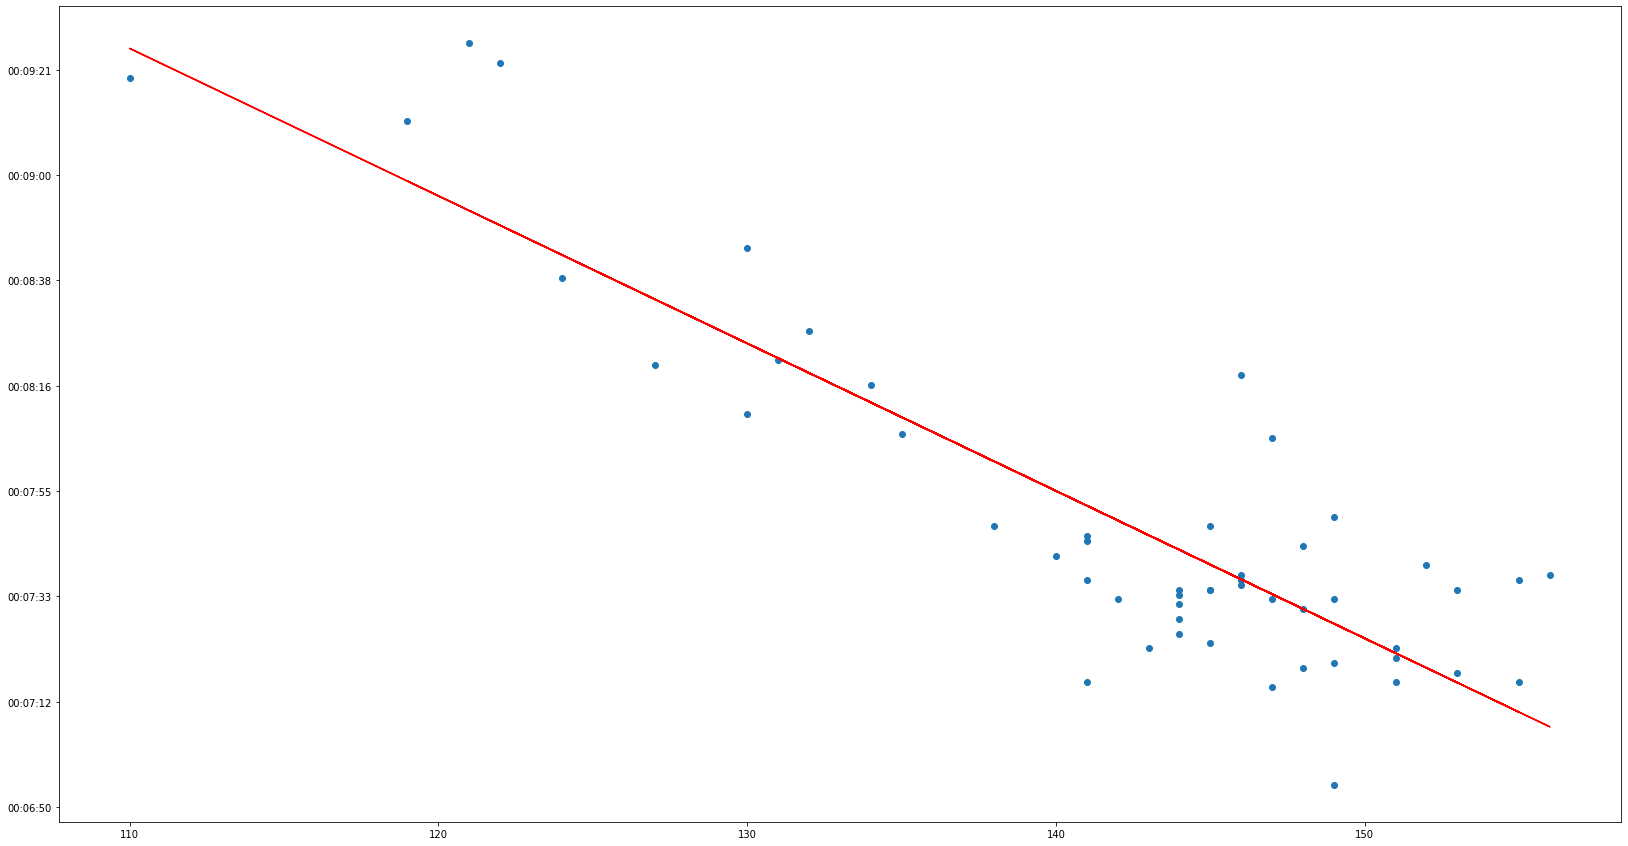

In [59]:
#Let's look at heart rate by pace:
fig, ax = plt.subplots(figsize=(28,15))
ax.scatter(s_3_3_run[s_3_3_run['is_race'] == 0]['avg_hr'], train_pace)
ax.yaxis.set_major_formatter(mdates.DateFormatter("%H:%M:%S"))
m, b = np.polyfit(s_3_3_run[s_3_3_run['is_race'] == 0]['avg_hr'], train_pace, 1)
plt.plot((s_3_3_run[s_3_3_run['is_race'] == 0]['avg_hr']), (s_3_3_run[s_3_3_run['is_race'] == 0]['avg_hr'])*m+b, color='red')
plt.savefig('./images/pace_v_hr_athlete_3.png')

In [60]:
#Ah now this looks promising!

In [61]:
#This looks promising. Let's go back and scale the other graphs with this data. It makes sense: If you are working at a lower heart rate, you should see a 
#slower pace for the same course based on ft/mile gained over the course.

In [62]:
athlete_max_hr = 175

In [63]:
s_3_3_run['ft_per_mile'] = (s_3_3_run['elev_gain']/s_3_3_run['distance'])

In [64]:
s_3_3_run['ft_per_mile']

date
2018-03-10    14.848485
2018-03-11    34.138218
2018-03-13    33.089312
2018-03-14    13.043478
2018-03-15    31.273177
2018-03-16    23.456790
2018-03-17    27.859779
2018-03-18    31.973356
2018-03-20    25.435074
2018-03-22    34.338747
2018-03-24    26.909350
2018-03-25    28.301887
2018-03-29    15.688950
2018-03-31    31.855956
2018-04-03    16.197183
2018-04-04    28.106509
2018-04-07    23.826715
2018-04-08    36.406397
2018-04-08    37.816764
2018-04-10    23.628692
2018-04-11    24.793388
2018-04-12    21.777778
2018-04-14    38.220230
2018-04-15    19.699812
2018-04-18    18.292683
2018-04-19    38.605230
2018-04-21    23.333333
2018-04-22    28.352490
2018-04-26    20.136519
2018-04-27    36.636137
2018-04-28    25.428571
2018-05-01    15.768463
2018-05-08    20.774648
2018-05-09    27.868852
2018-05-12    17.270195
2018-05-13    33.066933
2018-05-14    19.834711
2018-05-15    35.231788
2018-05-16    36.623832
2018-05-18    30.396476
2018-05-19    29.216867
2018-05-20 

In [65]:
s_3_3_run['intensity'] = s_3_3_run['avg_hr']/athlete_max_hr
s_3_3_run[['intensity', 'avg_pace', 'distance']]

,intensity,avg_pace,distance
date,,,
2018-03-10,0.874286,0 days 00:07:35,3.30
2018-03-11,0.834286,0 days 00:07:38,12.01
2018-03-13,0.851429,0 days 00:07:20,6.83
2018-03-14,0.691429,0 days 00:09:27,2.53
2018-03-15,0.845714,0 days 00:07:31,8.09
2018-03-16,0.708571,0 days 00:08:39,4.05
2018-03-17,0.891429,0 days 00:07:38,5.42
2018-03-18,0.822857,0 days 00:07:34,12.01
2018-03-20,0.817143,0 days 00:07:23,7.47


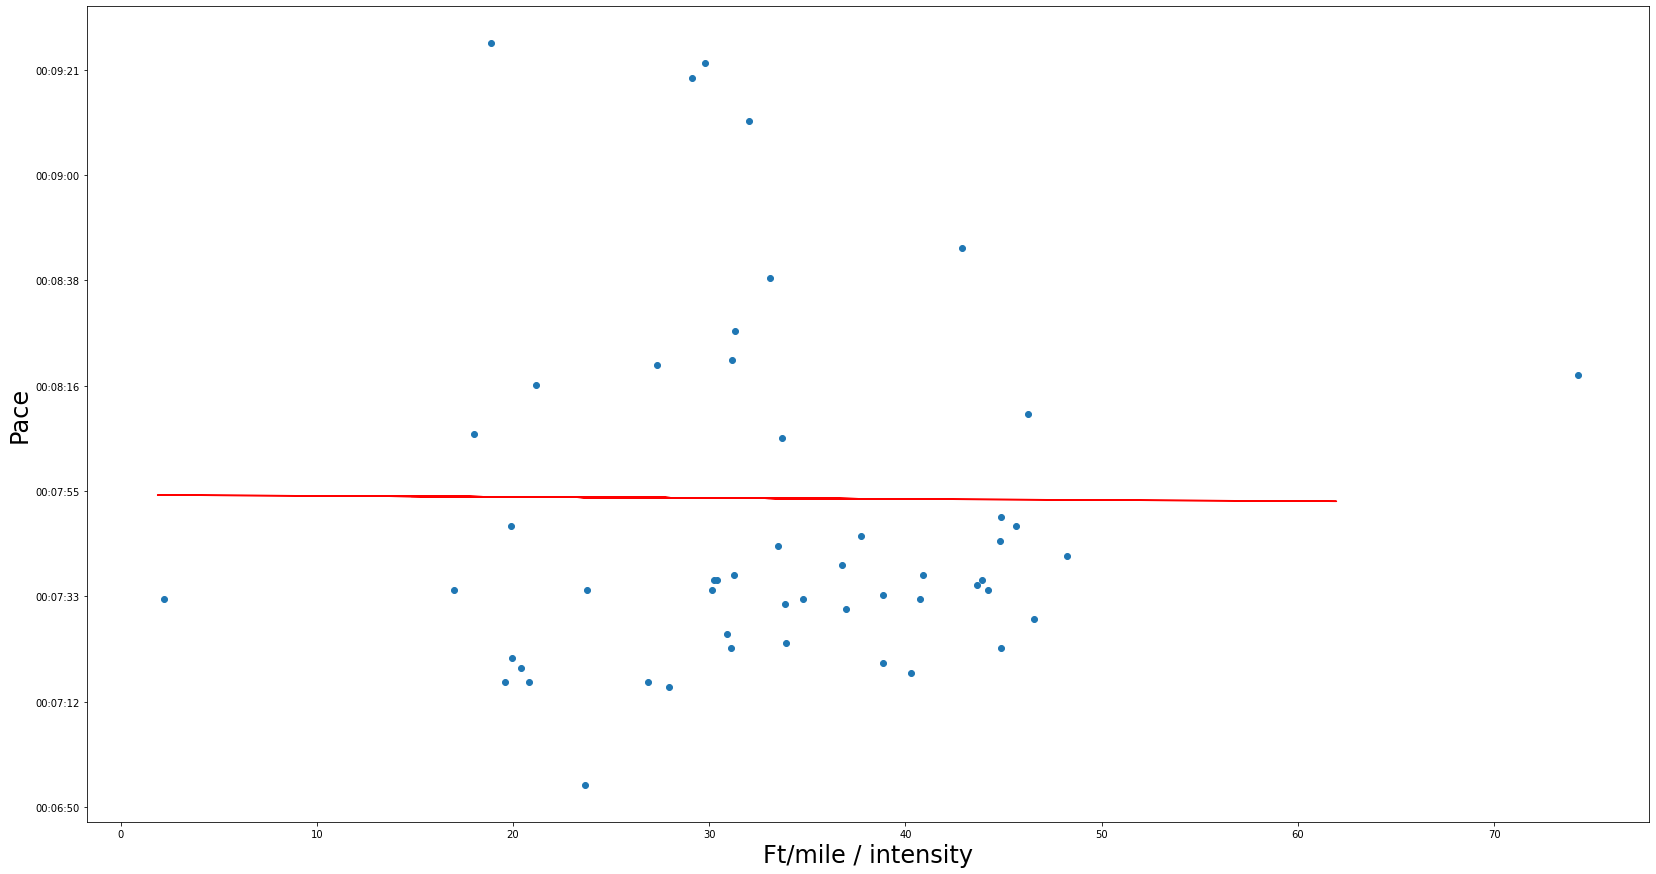

In [66]:
#Ok with the grade(ft/mile) and the intensity(how hard someone is working) we should be able to scale the paces with respect to distance.
#Let's try with just the intensity first:
#let's graph elevation gain per mile vs. pace:
fig, ax = plt.subplots(figsize=(28,15))
ax.scatter(s_3_3_run[s_3_3_run['is_race'] == 0]['ft_per_mile']/s_3_3_run[s_3_3_run['is_race'] == 0]['intensity'], (train_pace)) #(train_pace*s_3_3_run[s_3_3_run['is_race'] == 0]['intensity']))
ax.yaxis.set_major_formatter(mdates.DateFormatter("%H:%M:%S"))
ax.set_xlabel("Ft/mile / intensity",fontsize=24)
ax.set_ylabel("Pace", fontsize=24)
m, b = np.polyfit(s_3_3_run[s_3_3_run['is_race'] == 0]['elev_gain']/s_3_3_run[s_3_3_run['is_race'] == 0]['intensity'], train_pace, 1)
plt.plot((s_3_3_run[s_3_3_run['is_race'] == 0]['ft_per_mile']), (s_3_3_run[s_3_3_run['is_race'] == 0]['ft_per_mile'])*m+b, color='red')

In [67]:
#Going to try adjusting the pace for elevation gain

In [68]:
s_3_3_run['avg_pace']

date
2018-03-10   0 days 00:07:35
2018-03-11   0 days 00:07:38
2018-03-13   0 days 00:07:20
2018-03-14   0 days 00:09:27
2018-03-15   0 days 00:07:31
2018-03-16   0 days 00:08:39
2018-03-17   0 days 00:07:38
2018-03-18   0 days 00:07:34
2018-03-20   0 days 00:07:23
2018-03-22   0 days 00:08:11
2018-03-24   0 days 00:07:37
2018-03-25   0 days 00:08:06
2018-03-29   0 days 00:07:48
2018-03-31   0 days 00:08:45
2018-04-03   0 days 00:08:17
2018-04-04   0 days 00:07:24
2018-04-07   0 days 00:07:16
2018-04-08   0 days 00:07:36
2018-04-08   0 days 00:07:48
2018-04-10   0 days 00:08:28
2018-04-11   0 days 00:07:35
2018-04-12   0 days 00:09:11
2018-04-14   0 days 00:07:50
2018-04-15   0 days 00:07:35
2018-04-18   0 days 00:09:20
2018-04-19   0 days 00:07:42
2018-04-21   0 days 00:08:22
2018-04-22   0 days 00:07:44
2018-04-26   0 days 00:06:55
2018-04-27   0 days 00:07:35
2018-04-28   0 days 00:07:26
2018-05-01   0 days 00:07:16
2018-05-08   0 days 00:09:23
2018-05-09   0 days 00:07:32
2018-05-1

In [69]:
s_3_3_run['spd_ft_s'] = 0.0
s_3_3_run['spd_mph'] = 0.0

for i in range(len(s_3_3_run['avg_pace'])):
    #print(60/(s_3_3_run['avg_pace'][i].total_seconds()/60.0))
    s_3_3_run['spd_mph'][i] = float(60/(s_3_3_run['avg_pace'][i].total_seconds()/60.0))
    s_3_3_run['spd_ft_s'][i] = float(60.0/(s_3_3_run['avg_pace'][i].total_seconds()/60.0))*float(5280.0/3600.0)


In [70]:
s_3_3_run['spd_mph']

date
2018-03-10    7.912088
2018-03-11    7.860262
2018-03-13    8.181818
2018-03-14    6.349206
2018-03-15    7.982262
2018-03-16    6.936416
2018-03-17    7.860262
2018-03-18    7.929515
2018-03-20    8.126411
2018-03-22    7.331976
2018-03-24    7.877462
2018-03-25    7.407407
2018-03-29    7.692308
2018-03-31    6.857143
2018-04-03    7.243461
2018-04-04    8.108108
2018-04-07    8.256881
2018-04-08    7.894737
2018-04-08    7.692308
2018-04-10    7.086614
2018-04-11    7.912088
2018-04-12    6.533575
2018-04-14    7.659574
2018-04-15    7.912088
2018-04-18    6.428571
2018-04-19    7.792208
2018-04-21    7.171315
2018-04-22    7.758621
2018-04-26    8.674699
2018-04-27    7.912088
2018-04-28    8.071749
2018-05-01    8.256881
2018-05-08    6.394316
2018-05-09    7.964602
2018-05-12    8.200456
2018-05-13    7.947020
2018-05-14    7.185629
2018-05-15    8.219178
2018-05-16    7.877462
2018-05-18    7.725322
2018-05-19    7.947020
2018-05-20    7.826087
2018-05-22    8.275862
2018-0

In [71]:
s_3_3_run['GAP_ft_s'] = 0.0
for i in range(len(s_3_3_run)):
    #print(s_3_3_run['spd_ft_s'][i])
    #print(s_3_3_run['spd_ft_s'][i]**2)
    #print(s_3_3_run['elev_gain'][i])
    #print(s_3_3_run['distance'][i]*5280)
    
    #using trig to calculate the change to the pace:
    factor = (np.sqrt((s_3_3_run['distance'][i]*5280)**2+s_3_3_run['elev_gain'][i]**2)/(s_3_3_run['distance'][i]*5280))
    #print(np.sqrt(s_3_3_run['spd_ft_s'][i]**2 + 2*32.2*s_3_3_run['elev_gain'][i]))
    s_3_3_run['GAP_ft_s'][i] = factor*s_3_3_run['spd_ft_s'][i]

s_3_3_run[['spd_ft_s','GAP_ft_s']]

,spd_ft_s,GAP_ft_s
date,,
2018-03-10,11.604396,11.604441
2018-03-11,11.528384,11.528625
2018-03-13,12.000000,12.000236
2018-03-14,9.312169,9.312198
2018-03-15,11.707317,11.707522
2018-03-16,10.173410,10.173511
2018-03-17,11.528384,11.528545
2018-03-18,11.629956,11.630169
2018-03-20,11.918736,11.918874


In [72]:
#Now lets scale these by the intensity factor:
s_3_3_run['intensity']

date
2018-03-10    0.874286
2018-03-11    0.834286
2018-03-13    0.851429
2018-03-14    0.691429
2018-03-15    0.845714
2018-03-16    0.708571
2018-03-17    0.891429
2018-03-18    0.822857
2018-03-20    0.817143
2018-03-22    0.742857
2018-03-24    0.885714
2018-03-25    0.840000
2018-03-29    0.788571
2018-03-31    0.742857
2018-04-03    0.765714
2018-04-04    0.828571
2018-04-07    0.885714
2018-04-08    0.834286
2018-04-08    0.828571
2018-04-10    0.754286
2018-04-11    0.822857
2018-04-12    0.680000
2018-04-14    0.851429
2018-04-15    0.828571
2018-04-18    0.628571
2018-04-19    0.800000
2018-04-21    0.748571
2018-04-22    0.845714
2018-04-26    0.851429
2018-04-27    0.828571
2018-04-28    0.822857
2018-05-01    0.805714
2018-05-08    0.697143
2018-05-09    0.822857
2018-05-12    0.845714
2018-05-13    0.811429
2018-05-14    0.725714
2018-05-15    0.874286
2018-05-16    0.834286
2018-05-18    0.805714
2018-05-19    0.840000
2018-05-20    0.868571
2018-05-22    0.840000
2018-0

In [73]:
#Why divide by intensity? This brings average run pace up to the speed that we would expect if the athlete was at their highest average
#sustainable heartrate for this speed. 
s_3_3_run['GAP_by_intensity']  = s_3_3_run['GAP_ft_s']/s_3_3_run['intensity']

In [97]:
s_3_3_run[['GAP_by_intensity', 'distance', 'avg_hr']] 

,GAP_by_intensity,distance,avg_hr
date,,,
2018-03-10,13.273054,3.30,153
2018-03-11,13.818558,12.01,146
2018-03-13,14.094236,6.83,149
2018-03-14,13.468055,2.53,121
2018-03-15,13.843354,8.09,148
2018-03-16,14.357777,4.05,124
2018-03-17,12.932662,5.42,156
2018-03-18,14.133886,12.01,144
2018-03-20,14.586035,7.47,143


Now lets graph the GAP_by_intensity versus the distance:

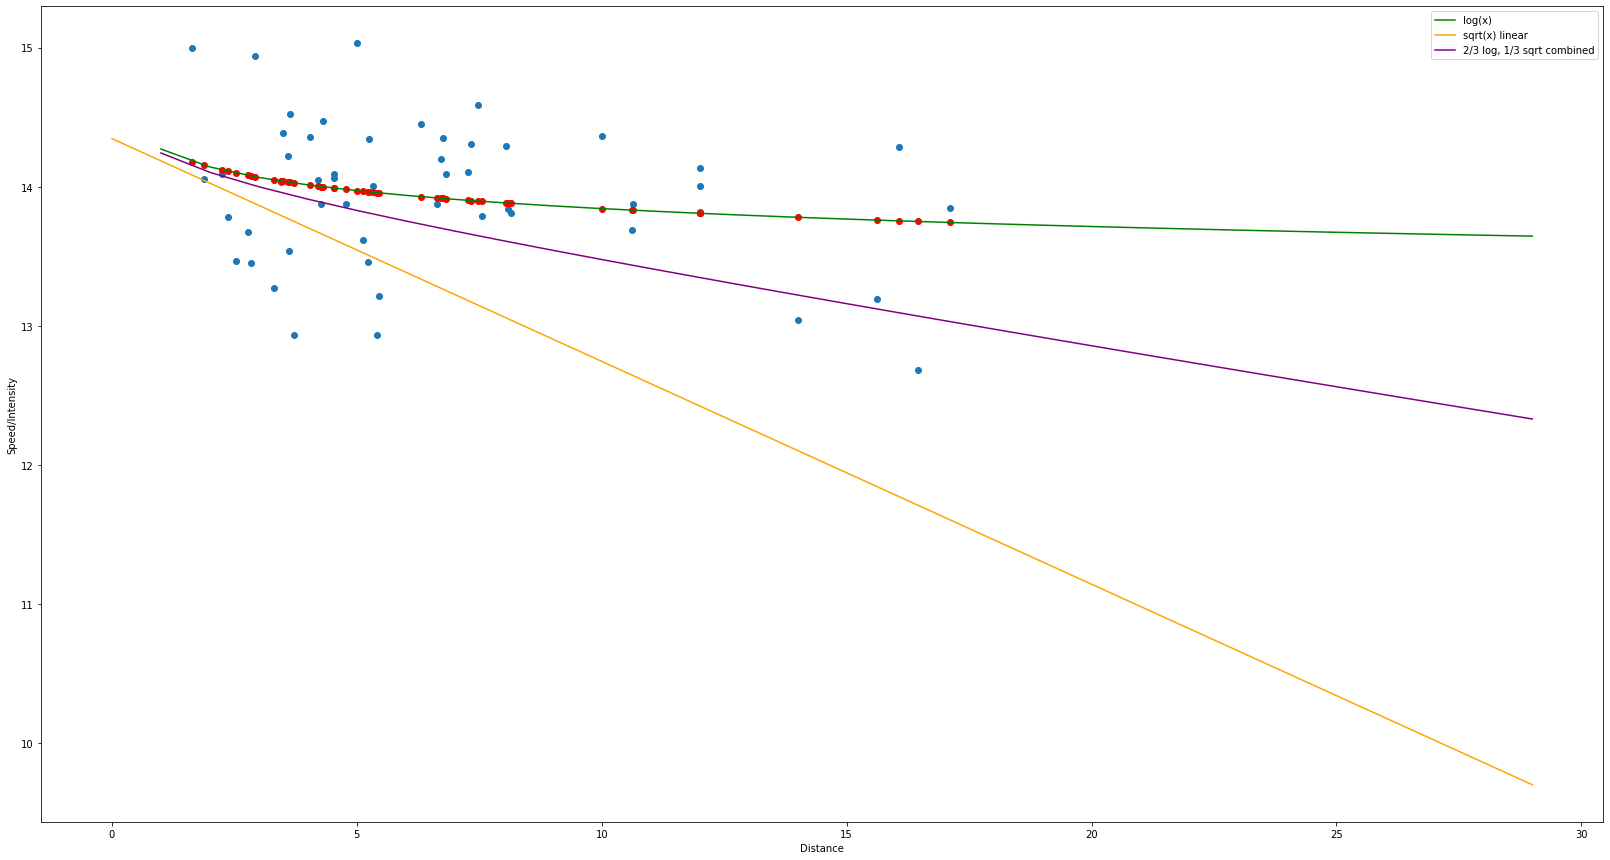

In [76]:
fig, ax = plt.subplots(figsize=(28,15))
ax.scatter(s_3_3_run[s_3_3_run['is_race'] == 0]['distance'], s_3_3_run[s_3_3_run['is_race'] == 0]['GAP_by_intensity'])
m, b = np.polyfit(np.log(s_3_3_run[s_3_3_run['is_race'] == 0]['distance']), (s_3_3_run[s_3_3_run['is_race'] == 0]['GAP_by_intensity']), 1)
z, c = np.polyfit((s_3_3_run[s_3_3_run['is_race'] == 0]['distance']**(.5)), (s_3_3_run[s_3_3_run['is_race'] == 0]['GAP_by_intensity']), 1)
plt.scatter((s_3_3_run[s_3_3_run['is_race'] == 0]['distance']), np.log(s_3_3_run[s_3_3_run['is_race'] == 0]['distance'])*m+b, color='red')
plt.plot(range(30), np.log(range(30))*m+b, color='green', label = 'log(x)')
plt.plot(range(30), range(30)*z+c, color = 'orange', label = 'sqrt(x) linear')
plt.plot(range(30), (2*(np.log(range(30))*m+b)+range(30)*z+c)/3, color = 'purple', label = '2/3 log, 1/3 sqrt combined')

plt.xlabel("Distance")
plt.ylabel("Speed/Intensity")
plt.legend()

In [77]:
m

-0.18598782571071185

In [78]:
b

14.271048230266302

In [79]:
m*np.log(26.2)+b

13.663656738163443

In [ ]:
#This puts the athlete at a 6:49 pace for the marathon. When we multiply by the .85d intensity expected at marathon pace, we get:
#~ 7:40 miles. That seems very reasonable.

In [322]:
z, c = np.polyfit((s_3_3_run[s_3_3_run['is_race'] == 0]['distance']**(.5)), (s_3_3_run[s_3_3_run['is_race'] == 0]['GAP_by_intensity']), 1)

In [323]:
z*26.2+c

10.147948559856577

In [ ]:
#The square root linear regression puts them at a 8:22.

In [333]:
z_2, c_2 = np.polyfit((s_3_3_run[s_3_3_run['is_race'] == 0]['distance']), (s_3_3_run[s_3_3_run['is_race'] == 0]['GAP_by_intensity']), 1)

In [334]:
z_2*26.2+c_2

13.33180490930868

In [ ]:
#The straight linear pace gets us to 6:40 miles, * .85 IF = 7:48 miles.

In [279]:
#What was the athlete's race time?

It turns out, this was an interesting race year. On race day, it was 90 degrees and sunny, very different than in years past, and different than the athlete's
training. However from the estimations, it looks like a linear relationship (orange) is not as accurate as the logarithmic relationship (green). The athlete actually performed below the linear relationship's expectation (10:49) due to cramping. More athletes will need to be examined.

In [307]:
#It looks like an average of the two estimations might be the most accurate?

In [308]:
(13.0562+10.1480)/2

11.6021

Gives us about a 7:36 for the marathon. That seems about right.

for a 2/3, 1/3 weighted average of the logarithmic and linear relationships, we predict:

In [312]:
(2*(np.log(26.2)*m+b)+26.2*z+c)/3 #Answer is in ft/s

12.086826350659242

or around a 7:19 mile. Reasonable if it was just running.

In [281]:
sample_3_mo[sample_3_mo['is_race'] == 1]

,activity_type,favorite,title,distance,calories,time,avg_hr,max_hr,aerobic_te,avg_run_cadence,...,decompression,best_lap_time,number_of_laps,max_temp,avg_resp,min_resp,max_resp,athlete_id,filetype,is_race
date,,,,,,,,,,,,,,,,,,,,,
2018-05-05,Multisport,True,Hurricane Multi-Sport,70.12,"3,699",04:35:41,0,172,0.0,0,...,No,00:00.00,5,0.0,0,0,0,3,garmin,1
2018-05-05,Cycling,False,Hurricane Cycling,55.55,"2,378",02:28:57,150,159,0.0,0,...,No,00:00.00,1,0.0,0,0,0,3,garmin,1
2018-06-10,Multisport,True,Boulder Multi-Sport,139.75,"6,936",11:00:17,0,162,0.0,0,...,No,00:00.00,5,0.0,0,0,0,3,garmin,1
2018-06-10,Cycling,False,Boulder Cycling,117.35,"4,019",10:25:46,144,160,0.0,0,...,No,00:00.00,2,0.0,0,0,0,3,garmin,1


In [ ]:
#8:22 is much more reasonable estimate than 6:50 pace.

In [ ]:
#Ok, looks like I have a fit, with some coefficients. Here is my idea on how this will work:
#We will first build a function to do this type of plotting, for any number of data points in a race training file.
#We will build a switching function and a column to track what the most likely fit to the data is, and select that as the most likely fit.
#We will then use that curve to predict a speed, with the appropriate type of function (log, linear, other?)
#As new data points are added, the curve will be re-fit, and re-scored, adjusting the curve and changing the type of fit if necessary.


In [85]:
#Read in the athlete dictionary:
with open("./data/athletes.json") as json_file: 
    athletes = json.load(json_file)

In [87]:
athletes["9"]['max_hr']

163

In [319]:
athletes[str(1)]['max_hr']

175

In [17]:
test = pd.read_csv(test_str)
test['elev_gain'].str.replace(',', '').unique()

array(['732', '108', '2110', '266', '157', '66', '0', '814', '82', '318',
       '148', '200', '446', '709', '118', '180', '312', '184', '154',
       '571', '1335', '207', '171', '558', '1115'], dtype=object)

In [37]:
test[test['is_race'] == 1]

,date,activity_type,favorite,title,distance,calories,time,avg_hr,max_hr,aerobic_te,...,decompression,best_lap_time,number_of_laps,max_temp,race,athlete_id,filetype,is_race,avg_pace,best_pace
33,2020-05-09,Cycling,False,Sparta Cycling,51.94,"1,153",03:03:14,111,135.0,0.3,...,No,06:44.85,11.0,0.0,0,0,garmin,1,00:00:00,00:00:00


In [83]:
def analyze_file(filepath, sport, athlete_id): #Athlete id is a number no need to pass it the string:
    '''
    This function takes in a file, converts all the columns to numeric and date that we need,
    creates a speed column for running that converts pace to speed in ft/s, and prepares the 
    columns for the fit function that will later be used to predict the running pace. It will 
    create and output all the graphs we have here, for each of the races in the filepath.
    '''
    #Read in the dataframe:
    raw = pd.read_csv(filepath)
    sport = sport
    athlete_max_hr = athletes[str(athlete_id)]['max_hr']
    #Filter down just to the sport:
    df = raw[raw['activity_type'] == sport]
    
    
    #Setting average pace to a timedelta, we use a try in case the data does not have avg_pace column:
    try:
        df['avg_pace'] = pd.to_timedelta(df['avg_pace'])
    except:
        print("No avg_pace column!")
    
    try:
        df['distance'] = pd.to_numeric(df['distance'])
    except:
        print(f"Check athlete #{athlete_id} at filepath ###{filepath}###")
    
    try:
        df['elev_gain'] = pd.to_numeric(df['elev_gain'].str.replace(',', ''))
    except:
        try:
            df['elev_gain'] = pd.to_numeric(df['elev_gain'])
        except:
            print(f"Check athlete #{athlete_id} at filepath ###{filepath}###")
    
    #Create ft/mile column and intensity for analysis:
    df['ft_per_mile'] = (df['elev_gain']/df['distance'])
    df['intensity'] = df['avg_hr']/athlete_max_hr
    
    
    
    #Do the same for calculating speed in ft/s
    df['spd_ft_s'] = 0.0
    df['spd_mph'] = 0.0
    df.reset_index(inplace=True)
    
    for i in range(len(df['avg_pace'])):
        #.total_seconds returns the total seconds in a timedelta object.
        df['spd_mph'][i] = float(60/(df['avg_pace'][i].total_seconds()/60.0))
        #takes the speed in miles per hour and converts down to ft/s
        df['spd_ft_s'][i] = float(60.0/(df['avg_pace'][i].total_seconds()/60.0))*float(5280.0/3600.0)
        
    #The default is to be equal to the speed not taking into account elevation gain.
    df['GAP_ft_s'] = df['spd_ft_s']
    
    #Now we try to make a GAP column:
    for i in range(len(df)):
        #Try to make a GAP column:
        try:
            #using trig to calculate the change to the pace:
            factor = (np.sqrt((df['distance'][i]*5280)**2+df['elev_gain'][i]**2)/(df['distance'][i]*5280))
            df['GAP_ft_s'][i] = factor*df['spd_ft_s'][i]
        except:
            print("No GAP_ft_s was able to be calculated. Data is equal to spd_ft_s.")
        
    #Why divide by intensity? This brings average run pace up to the speed that we would expect if the athlete was at their highest average
    #sustainable heartrate for this speed. 
    df['GAP_by_intensity']  = df['GAP_ft_s']/df['intensity']
    
    #This creates a finalized dataframe with all of the columns I need for creating the pace curves.
    df.to_csv(filepath[:-4]+'_'+sport+'_extra_cols.csv')

In [41]:
analyze_file(test_str, 'Running', 0)

In [ ]:
#Will need to use this code for per-week fits:
#Log(sqrt(x)) appears to be a decent approximation of the curve. Means basically with the square of distance the pace decreases logarithmically.
    m, b = np.polyfit(np.log(df[df['is_race'] == 0]['distance']**0.5), (df[df['is_race'] == 0]['GAP_by_intensity']), 1)
    #Other fit we can maybe use is a linear fit on the square root of x:
    z, c = np.polyfit((df[df['is_race'] == 0]['distance']**(.5)), (df[df['is_race'] == 0]['GAP_by_intensity']), 1)

In [1]:
test_str = './data/races/athlete_0/athlete_0_race_0_1_mo.csv'

In [2]:
test_str[:-4]

'./data/races/athlete_0/athlete_0_race_0_1_mo'

In [36]:
test_str[9]

'c'

In [80]:
athlete_9_filepaths = (glob.glob('./data/races/athlete_9/*'))

In [81]:
athlete_9_filepaths

['./data/races/athlete_9/athlete_9_race_20_1_mo.csv',
 './data/races/athlete_9/athlete_9_race_7_1_mo.csv',
 './data/races/athlete_9/athlete_9_race_6_1_mo.csv',
 './data/races/athlete_9/athlete_9_race_15_1_mo.csv',
 './data/races/athlete_9/athlete_9_race_14_1_mo.csv',
 './data/races/athlete_9/athlete_9_race_7_3_mo.csv',
 './data/races/athlete_9/athlete_9_race_6_3_mo.csv',
 './data/races/athlete_9/athlete_9_race_15_3_mo.csv',
 './data/races/athlete_9/athlete_9_race_14_3_mo.csv',
 './data/races/athlete_9/athlete_9_race_20_3_mo.csv',
 './data/races/athlete_9/athlete_9_race_0_3_mo.csv',
 './data/races/athlete_9/athlete_9_race_1_3_mo.csv',
 './data/races/athlete_9/athlete_9_race_12_3_mo.csv',
 './data/races/athlete_9/athlete_9_race_13_3_mo.csv',
 './data/races/athlete_9/athlete_9_race_18_3_mo.csv',
 './data/races/athlete_9/athlete_9_race_19_3_mo.csv',
 './data/races/athlete_9/athlete_9_race_18_1_mo.csv',
 './data/races/athlete_9/athlete_9_race_19_1_mo.csv',
 './data/races/athlete_9/athlete_9

In [88]:
for filepath in athlete_9_filepaths:
    analyze_file(filepath, 'Running', 9)

In [93]:

for i in range(13):
    filepaths = glob.glob(f'./data/races/athlete_{i}/*')
    for filepath in filepaths:
        try:
            analyze_file(filepath, 'Running', i)
        except:
            print("File at "+filepath+" was not processed.")

Check athlete #1 at filepath ###./data/races/athlete_1/athlete_1_race_0_1_mo.csv###
Check athlete #1 at filepath ###./data/races/athlete_1/athlete_1_race_0_3_mo.csv###
Check athlete #4 at filepath ###./data/races/athlete_4/athlete_4_race_2_1_mo.csv###
Check athlete #4 at filepath ###./data/races/athlete_4/athlete_4_race_3_1_mo.csv###
File at ./data/races/athlete_4/athlete_4_race_2_3_mo.csv was not processed.
Check athlete #4 at filepath ###./data/races/athlete_4/athlete_4_race_4_1_mo.csv###
File at ./data/races/athlete_4/athlete_4_race_1_3_mo.csv was not processed.
Check athlete #4 at filepath ###./data/races/athlete_4/athlete_4_race_1_1_mo.csv###
File at ./data/races/athlete_4/athlete_4_race_1_1_mo.csv was not processed.
Check athlete #5 at filepath ###./data/races/athlete_5/athlete_5_race_5_1_mo.csv###
Check athlete #5 at filepath ###./data/races/athlete_5/athlete_5_race_4_1_mo.csv###
Check athlete #5 at filepath ###./data/races/athlete_5/athlete_5_race_5_3_mo.csv###
File at ./data/r

In [94]:
test = pd.read_csv('./data/races/athlete_0/athlete_0_race_0_1_mo_Running_extra_cols.csv')

In [95]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                29 non-null     int64  
 1   index                     29 non-null     int64  
 2   date                      29 non-null     object 
 3   activity_type             29 non-null     object 
 4   favorite                  29 non-null     bool   
 5   title                     29 non-null     object 
 6   distance                  29 non-null     float64
 7   calories                  29 non-null     object 
 8   time                      29 non-null     object 
 9   avg_hr                    29 non-null     int64  
 10  max_hr                    29 non-null     int64  
 11  avg_run_cadence           29 non-null     int64  
 12  max_run_cadence           29 non-null     int64  
 13  avg_pace                  29 non-null     object 
 14  best_pace   

Let's see if we can see trends with cycling data: